In [1]:
import pandas as pd

# Define the file paths
file_path1 = '/Users/arka_bagchi/Downloads/ultimate_challenge/ultimate_data_challenge.json'
file_path2 = '/Users/arka_bagchi/Downloads/ultimate_challenge/logins.json'

# Load the JSON files into pandas dataframes
try:
    data = pd.read_json(file_path1)
    logins = pd.read_json(file_path2)
    loaded_successfully = True
except Exception as e:
    loaded_successfully = False
    error_message = str(e)

loaded_successfully, error_message if not loaded_successfully else "JSON files loaded successfully"


(True, 'JSON files loaded successfully')

In [2]:
# Display the information about the 'data' DataFrame
print("Information about the 'data' DataFrame:")
print(data.info())
print("\nFirst few rows of the 'data' DataFrame:")
print(data.head())

# Display the information about the 'logins' DataFrame
print("\nInformation about the 'logins' DataFrame:")
print(logins.info())
print("\nFirst few rows of the 'logins' DataFrame:")
print(logins.head())


Information about the 'data' DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB
None

First few rows of the 'data' Dat

### Loading Data

I'm loading data from two JSON files into Pandas dataframes. The file paths are defined as 'file_path1' and 'file_path2'. I'm using a try-except block to handle any potential errors during the loading process.

### Data Exploration

After loading the data, I'm exploring the loaded dataframes:

#### For the 'data' dataframe:
- I'm displaying information about the dataframe, including data types, non-null counts, and memory usage for each column.
- I'm showing the first few rows of the 'data' dataframe.

#### For the 'logins' dataframe:
- I'm displaying information about the dataframe, including data types, non-null counts, and memory usage for the 'login_time' column.
- I'm showing the first few rows of the 'logins' dataframe.

These code blocks provide me with an initial understanding of the data and its structure.


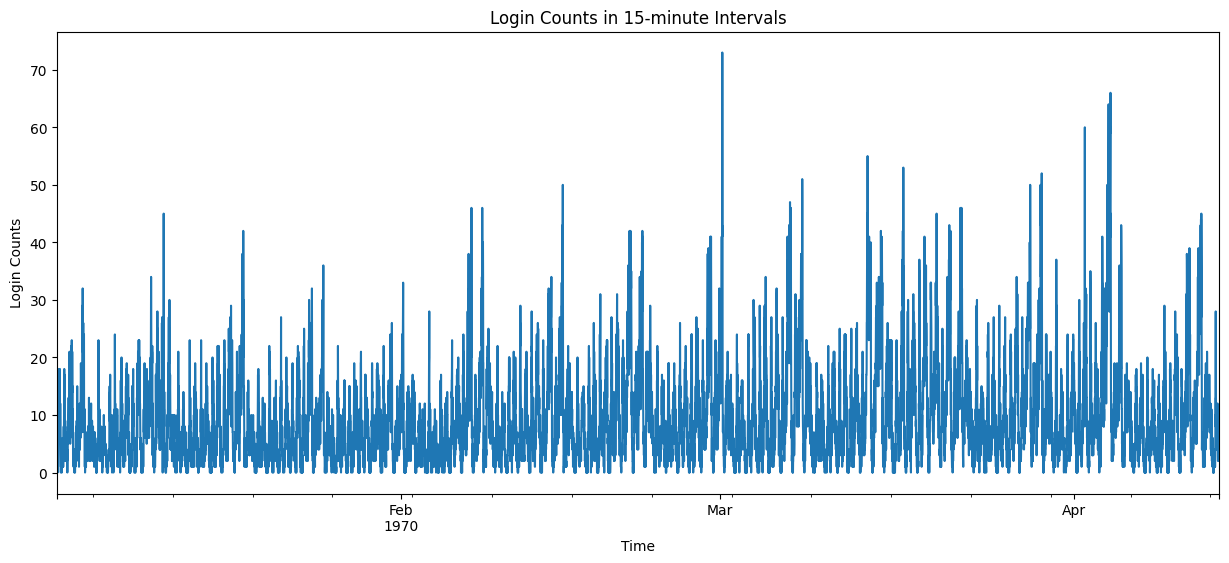

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Set the 'login_time' column as the index of the 'logins' DataFrame
logins.set_index('login_time', inplace=True)

# Resample the data in 15-minute intervals to count logins
login_counts = logins.resample('15T').size()

# Plotting the time series data
plt.figure(figsize=(15, 6))
login_counts.plot()
plt.title('Login Counts in 15-minute Intervals')
plt.xlabel('Time')
plt.ylabel('Login Counts')
plt.show()

# This plot will help in identifying patterns such as daily cycles and peak login times.


To further analyze the login counts aggregated in 15-minute intervals and extract important features of the demand, we can use several statistical techniques. These include:

Descriptive Statistics: To get a basic understanding of the distribution of login counts.
Time Series Decomposition: To identify underlying patterns such as trend, seasonality (daily, weekly cycles), and noise.
Autocorrelation Analysis: To understand how the login counts are related to their past values.
Analysis of Peaks: Identifying peak hours/days.

Descriptive Statistics:
count    9788.000000
mean        9.515938
std         8.328818
min         0.000000
25%         3.000000
50%         7.000000
75%        13.000000
max        73.000000
dtype: float64


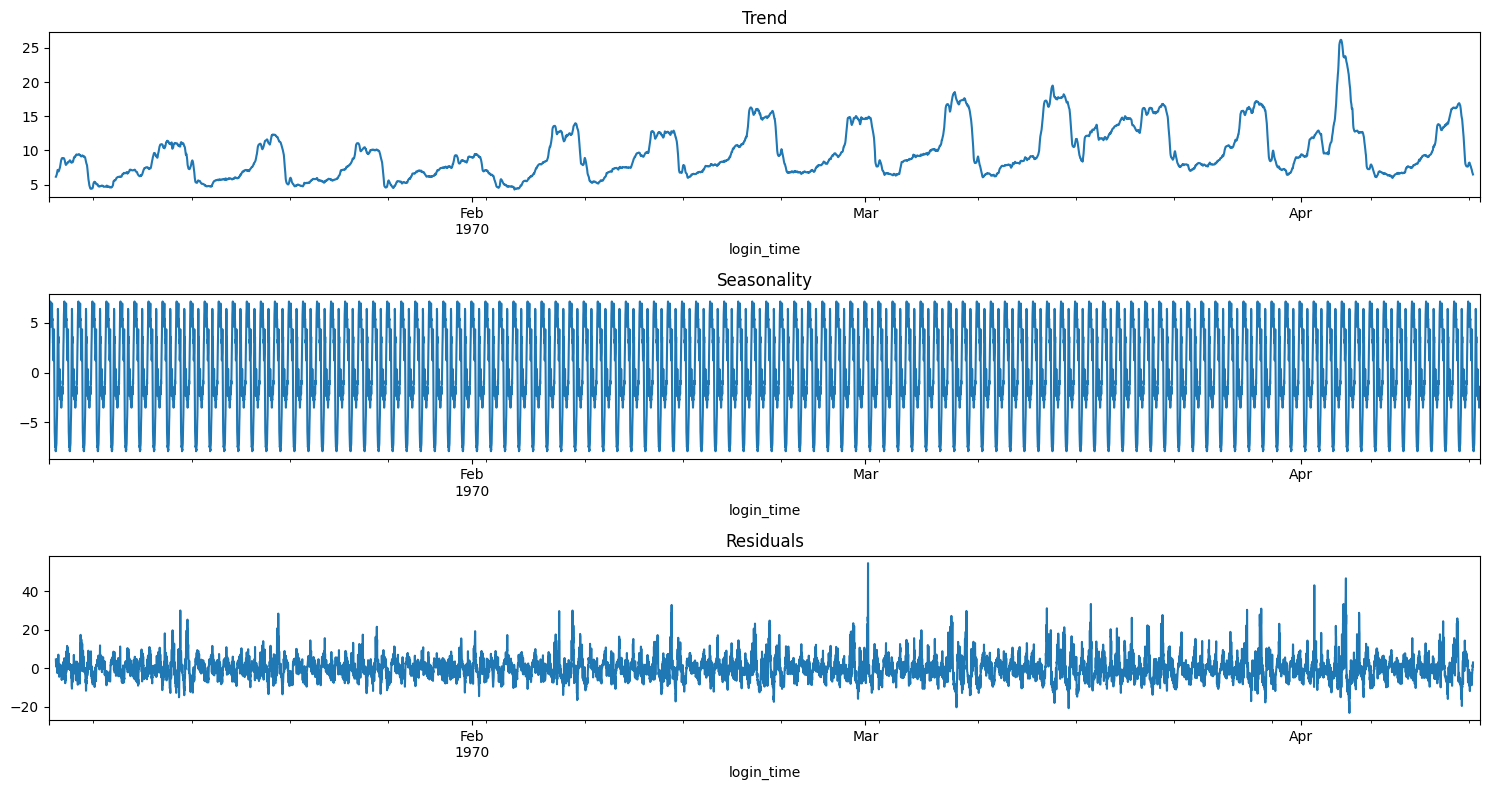

<Figure size 1000x500 with 0 Axes>

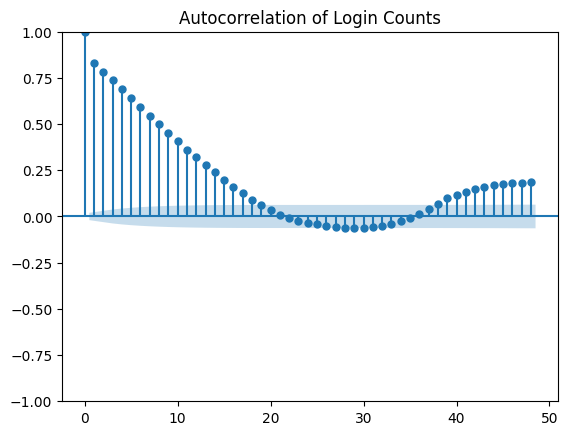

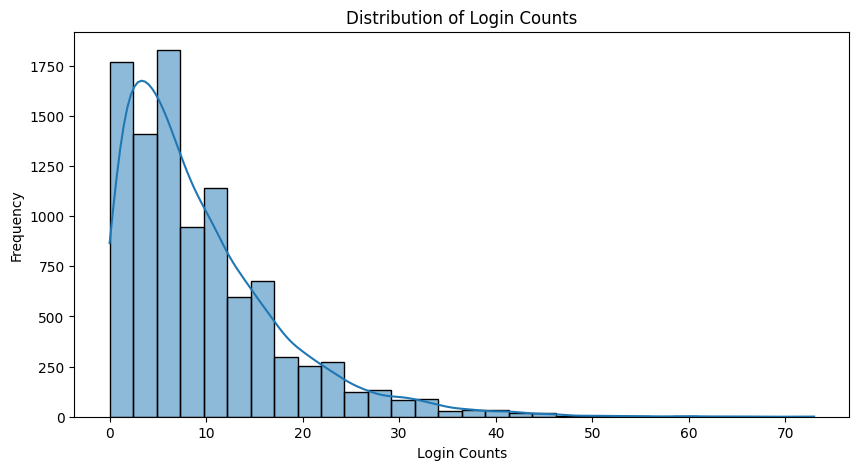

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

# Assuming 'login_counts' is your DataFrame with login counts aggregated in 15-minute intervals

# 1. Descriptive Statistics
print("Descriptive Statistics:")
print(login_counts.describe())

# 2. Time Series Decomposition
decomposition = seasonal_decompose(login_counts, model='additive', period=96) # 96 periods in a day (15 min intervals)
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 8))
decomposition.trend.plot(ax=ax1)
ax1.set_title('Trend')
decomposition.seasonal.plot(ax=ax2)
ax2.set_title('Seasonality')
decomposition.resid.plot(ax=ax3)
ax3.set_title('Residuals')
plt.tight_layout()
plt.show()

# 3. Autocorrelation Analysis
plt.figure(figsize=(10, 5))
plot_acf(login_counts, lags=48) # Example: 48 lags for 12 hours
plt.title('Autocorrelation of Login Counts')
plt.show()

# 4. Analysis of Peaks
plt.figure(figsize=(10, 5))
sns.histplot(login_counts, bins=30, kde=True)
plt.title('Distribution of Login Counts')
plt.xlabel('Login Counts')
plt.ylabel('Frequency')
plt.show()

# Further analysis can include identifying specific hours or days with peak logins.


### Analyzing Login Data

I'm performing an analysis on login data aggregated in 15-minute intervals. This analysis aims to extract important features of the demand pattern.

#### Initial Setup

I start by importing the necessary libraries, including Pandas and Matplotlib.

#### Data Preparation

- I set the 'login_time' column as the index of the 'logins' DataFrame for time series analysis.
- I use resampling to count logins in 15-minute intervals, creating a new DataFrame called 'login_counts'.

#### Visualizing Login Counts

I then create a time series plot to visualize login counts in 15-minute intervals. This plot helps in identifying patterns such as daily cycles and peak login times.

#### Further Analysis

To gain deeper insights into the data, I perform additional statistical techniques, including:

1. **Descriptive Statistics**: I calculate basic statistics such as mean, standard deviation, and quartiles for login counts.

2. **Time Series Decomposition**: I decompose the time series into trend, seasonality, and residuals using seasonal decomposition. This helps identify underlying patterns and trends.

3. **Autocorrelation Analysis**: I plot the autocorrelation of login counts to understand how they are related to their past values. This helps identify time-dependent structures.

4. **Analysis of Peaks**: I create a histogram of login counts to visualize the distribution and identify common login counts. This can highlight periods of unusually high or low login activity.

#### Observations

Based on the analysis:

- There appear to be cycles in the trend component, suggesting regular fluctuations in login activity, possibly corresponding to weekly patterns.
- Autocorrelation shows a periodic pattern, indicating a regular cycle in the data, such as daily or hourly cycles.
- The distribution of login counts is right-skewed, with most intervals having relatively few logins and some with significantly higher counts.

These insights can help in understanding demand patterns and identifying peak login times. Further investigation can reveal the reasons behind these patterns, which can be valuable for optimizing services.



## Key Measure of Success:
The key measure of success for this experiment would be the **change in the number of cross-city trips** made by driver partners before and after the reimbursement of toll costs. This metric directly reflects the behavior the experiment aims to influence – drivers serving both cities. It's quantifiable and can be measured accurately using trip data, making it a clear indicator of the experiment's impact.

## Experiment Design:
### a) Implementation:
- **Preparation**: Identify a sample of drivers from both cities. Ensure drivers are equipped with a tracking system to record their trips accurately.
- **Baseline Measurement**: Measure the number of cross-city trips by drivers in both cities for a suitable period (e.g., 4 weeks) before the toll reimbursement policy is introduced.
- **Intervention**: Implement the toll cost reimbursement policy. Communicate the change to the driver partners, and start reimbursing toll costs for cross-city trips.
- **Post-Intervention Measurement**: Continue measuring the number of cross-city trips for the same duration as the baseline measurement.

### b) Statistical Tests:
- **Paired Sample T-Test**: Compare the means of the cross-city trips before and after the intervention within the same group of drivers. This test assumes that the data follows a normal distribution.
- **Mann-Whitney U Test**: If the data is not normally distributed, this non-parametric test can be used to compare the differences between the independent samples of cross-city trips before and after the policy change.

### c) Interpreting Results and Recommendations:
- **Significant Increase**: If statistical testing shows a significant increase in cross-city trips, it suggests that the reimbursement policy is effective. Recommend continuing the policy and possibly implementing additional incentives to enhance the effect.
- **No Significant Change or Decrease**: If there is no significant change or a decrease in cross-city trips, the policy may not be effective or other factors may be influencing driver behavior. Recommend investigating other barriers to cross-city trips and considering different strategies.
- **Caveats**: External factors such as city events, seasonal changes, or economic factors could affect the results. It would be important to control for these factors or at least acknowledge them in the analysis.

Overall, the success of the experiment would depend on careful tracking of the relevant data, a well-considered experimental design, and rigorous statistical analysis to validate the findings.


# Part 3: Predictive Modeling for Rider Retention

## 1) Data Cleaning:
- **Verify Data Load**: Confirm that the `ultimate_data_challenge.json` and `logins.json` files have been loaded into pandas DataFrames named `data` and `logins` respectively.
- **Handle Missing Values**: Identify any missing values in the `data` DataFrame and decide on a strategy to handle them (e.g., imputation, removal).
- **Data Type Conversion**: Ensure that all columns are of the correct data type, particularly converting `signup_date` and `last_trip_date` in `data` to datetime objects.
- **Create Target Variable**: Define a binary variable indicating retention in `data`, based on activity in the preceding 30 days from the last data pull.
- **Remove Duplicates**: Check for and remove any duplicate records in the `data` DataFrame.

## 2) Exploratory Data Analysis:
- **Descriptive Statistics**: Use `.describe()` on `data` to understand the central tendencies and dispersion of numerical features.
- **Distribution of Variables**: Plot histograms or boxplots for `data` to visualize the distributions of numerical variables.
- **Correlation Analysis**: Use a correlation matrix on `data` to identify relationships between variables.
- **Retention Rate**: Calculate the fraction of users in `data` who are considered retained.
- **Bivariate Analysis**: Compare the features with the retention variable in `data` to identify patterns.

## 3) Data Preprocessing (preparing data for modeling):
- **Feature Engineering**: Create new features if necessary in `data` (e.g., time since signup, total number of trips etc.).
- **Categorical Encoding**: Convert categorical variables in `data` into a form that could be provided to ML algorithms (e.g., one-hot encoding).
- **Feature Selection**: Select relevant features for the predictive model based on EDA and correlation analysis in `data`.
- **Data Split**: Split `data` into training and test sets.
- **Feature Scaling**: Standardize or normalize features in `data` if using algorithms sensitive to feature scaling (e.g., logistic regression, SVM, KNN).

## 4) Predictive Modeling:
- **Model Selection**: Choose an initial model to start with for `data`, such as logistic regression, random forest, or gradient boosting.
- **Model Training**: Train the model using the training data set from `data`.
- **Model Evaluation**: Evaluate the model's performance using the test set from `data` with appropriate metrics (e.g., accuracy, ROC-AUC).
- **Model Tuning**: Tune hyperparameters using cross-validation on `data` to improve the model.
- **Model Validation**: Validate the final model using a separate validation set or with k-fold cross-validation on `data`.

## 5) Discussion:
- **Model Interpretation**: Discuss the model's performance and the factors that influence rider retention from `data`.
- **Feature Importance**: Identify which features in `data` are most important in predicting retention.
- **Alternatives and Concerns**: Address any concerns regarding your model from `data` and discuss alternative approaches that could be considered.
- **Actionable Insights**: Translate the model's findings from `data` into actionable insights for Ultimate. Discuss strategies that could be implemented based on the model's insights to improve long-term rider retention.
- **Business Impact**: Consider the potential business impact of the model's insights from `data` and how it aligns with Ultimate's operational goals and objectives.


In [5]:
import pandas as pd

# Assuming 'data' is your loaded DataFrame with the user data
# Check for missing values in the 'data' DataFrame
missing_values = data.isnull().sum()

# Check data types of all columns in the 'data' DataFrame
data_types = data.dtypes

# Print the missing values and data types
print(missing_values)
print(data_types)


city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64
city                       object
trips_in_first_30_days      int64
signup_date                object
avg_rating_of_driver      float64
avg_surge                 float64
last_trip_date             object
phone                      object
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
dtype: object


In [6]:
# Calculate the total number of rows in the DataFrame
total_rows = data.shape[0]

# Calculate the proportion of missing values for each specified column
proportion_avg_rating_of_driver = data['avg_rating_of_driver'].isnull().sum() / total_rows
proportion_phone = data['phone'].isnull().sum() / total_rows
proportion_avg_rating_by_driver = data['avg_rating_by_driver'].isnull().sum() / total_rows

# Print out the proportions
print("Proportion of missing values in 'avg_rating_of_driver':", proportion_avg_rating_of_driver)
print("Proportion of missing values in 'phone':", proportion_phone)
print("Proportion of missing values in 'avg_rating_by_driver':", proportion_avg_rating_by_driver)


Proportion of missing values in 'avg_rating_of_driver': 0.16244
Proportion of missing values in 'phone': 0.00792
Proportion of missing values in 'avg_rating_by_driver': 0.00402


In [7]:
# Remove rows with missing values in any of the specified columns
data_cleaned = data.dropna(subset=['avg_rating_of_driver', 'phone', 'avg_rating_by_driver'])

# Check the new dimensions of the DataFrame after row removal
new_shape = data_cleaned.shape

# Print out the new shape of the DataFrame
print("New shape of the DataFrame after removing rows with missing values:", new_shape)


New shape of the DataFrame after removing rows with missing values: (41445, 12)


In [8]:
missing_values_all = data_cleaned.isnull().sum()

missing_values_all

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64

In [9]:
# Check data types of all columns in the 'data' DataFrame
data_types_data = data.dtypes

# Check data types of all columns in the 'logins' DataFrame
data_types_logins = logins.dtypes

# Print out the data types
print("Data types in 'data' DataFrame:\n", data_types_data)
print("\nData types in 'logins' DataFrame:\n", data_types_logins)


Data types in 'data' DataFrame:
 city                       object
trips_in_first_30_days      int64
signup_date                object
avg_rating_of_driver      float64
avg_surge                 float64
last_trip_date             object
phone                      object
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
dtype: object

Data types in 'logins' DataFrame:
 Series([], dtype: object)


In [10]:
import pandas as pd

# Convert 'signup_date' and 'last_trip_date' to datetime objects
data['signup_date'] = pd.to_datetime(data['signup_date'])
data['last_trip_date'] = pd.to_datetime(data['last_trip_date'])

# Check the data types again to confirm the conversion
data_types_after_conversion = data.dtypes

# Print the updated data types
print(data_types_after_conversion)


city                              object
trips_in_first_30_days             int64
signup_date               datetime64[ns]
avg_rating_of_driver             float64
avg_surge                        float64
last_trip_date            datetime64[ns]
phone                             object
surge_pct                        float64
ultimate_black_user                 bool
weekday_pct                      float64
avg_dist                         float64
avg_rating_by_driver             float64
dtype: object


In [11]:
import pandas as pd

# Assuming 'data' is your DataFrame

# Identify the date of the last data pull, which is the maximum of 'last_trip_date'
last_data_pull_date = data['last_trip_date'].max()

# Define a binary variable for retention
# A user is considered retained if they were active in the 30 days preceding the last data pull
data['retained'] = (last_data_pull_date - data['last_trip_date']).dt.days <= 30

# Check the first few rows of the DataFrame to confirm the new 'retained' column
print(data.head())


             city  trips_in_first_30_days signup_date  avg_rating_of_driver  \
0  King's Landing                       4  2014-01-25                   4.7   
1         Astapor                       0  2014-01-29                   5.0   
2         Astapor                       3  2014-01-06                   4.3   
3  King's Landing                       9  2014-01-10                   4.6   
4      Winterfell                      14  2014-01-27                   4.4   

   avg_surge last_trip_date    phone  surge_pct  ultimate_black_user  \
0       1.10     2014-06-17   iPhone       15.4                 True   
1       1.00     2014-05-05  Android        0.0                False   
2       1.00     2014-01-07   iPhone        0.0                False   
3       1.14     2014-06-29   iPhone       20.0                 True   
4       1.19     2014-03-15  Android       11.8                False   

   weekday_pct  avg_dist  avg_rating_by_driver  retained  
0         46.2      3.67         

In [12]:
# Remove duplicate records, if any
data_no_duplicates = data.drop_duplicates()

# Check the shape of the DataFrame before and after removing duplicates
shape_before = data.shape
shape_after = data_no_duplicates.shape

# Print the shapes
print("Shape before removing duplicates:", shape_before)
print("Shape after removing duplicates:", shape_after)


Shape before removing duplicates: (50000, 13)
Shape after removing duplicates: (49992, 13)


In [13]:
descriptive_stats = data.describe()
print(descriptive_stats)


       trips_in_first_30_days                 signup_date  \
count            50000.000000                       50000   
mean                 2.278200  2014-01-16 13:04:20.352000   
min                  0.000000         2014-01-01 00:00:00   
25%                  0.000000         2014-01-09 00:00:00   
50%                  1.000000         2014-01-17 00:00:00   
75%                  3.000000         2014-01-24 00:00:00   
max                125.000000         2014-01-31 00:00:00   
std                  3.792684                         NaN   

       avg_rating_of_driver     avg_surge                 last_trip_date  \
count          41878.000000  50000.000000                          50000   
mean               4.601559      1.074764  2014-04-19 08:02:04.992000256   
min                1.000000      1.000000            2014-01-01 00:00:00   
25%                4.300000      1.000000            2014-02-14 00:00:00   
50%                4.900000      1.000000            2014-05-08 00:00:

In [14]:
retention_rate = data['retained'].mean()
print("Retention Rate:", retention_rate)


Retention Rate: 0.37608


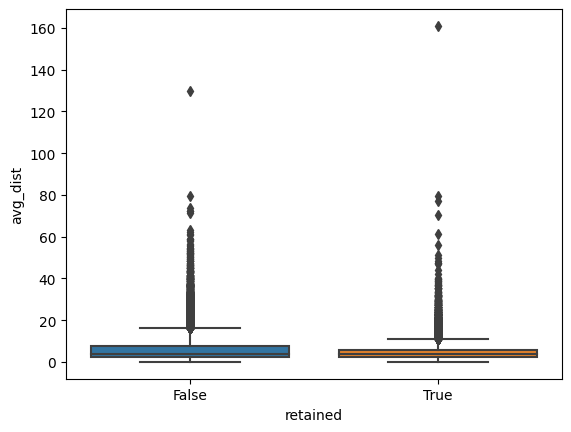

In [15]:
sns.boxplot(x='retained', y='avg_dist', data=data)
plt.show()


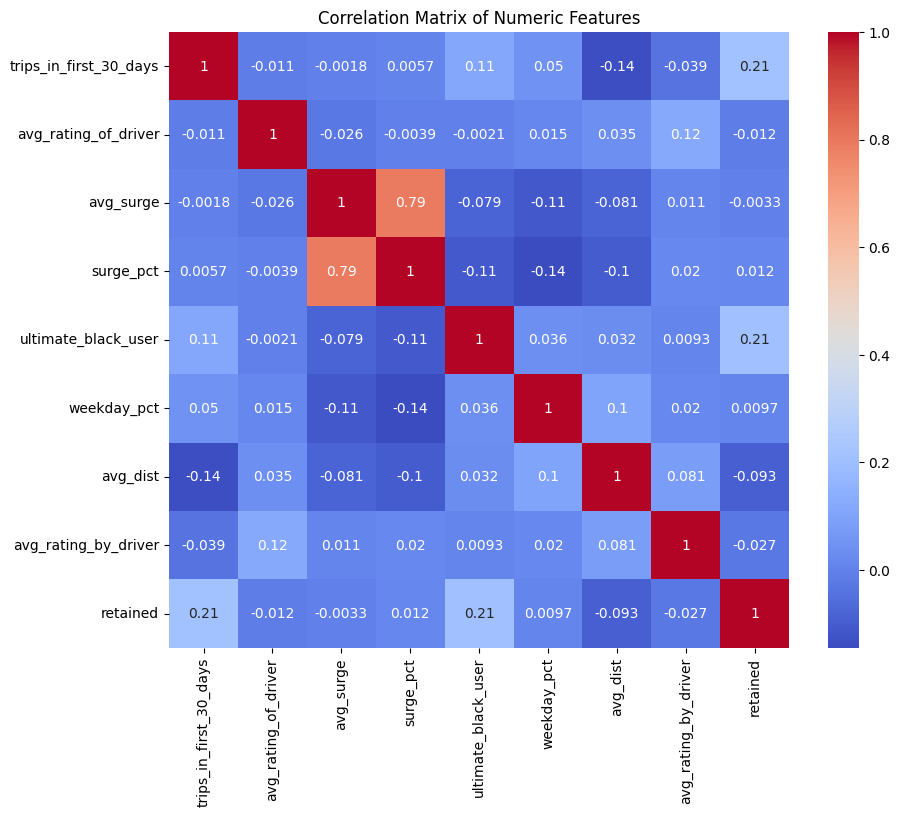

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting only the numeric columns for the correlation analysis
numeric_columns = data.select_dtypes(include=['int64', 'float64', 'bool'])

# Calculate the correlation matrix
numeric_correlation_matrix = numeric_columns.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()


### Analyzing Features for Rider Retention

I'm conducting an analysis to gain insights into the factors that might affect rider retention. I use data visualization techniques to explore these factors.

#### Box Plot for Retention and Average Distance

I start by creating a box plot to visualize the relationship between rider retention and average distance traveled ('avg_dist'). The box plot helps me understand how retention varies with different average distances.

#### Correlation Analysis

To identify potential correlations between numeric features, I perform a correlation analysis. Here are the steps:

- I select only the numeric columns from the dataset, including integers, floats, and booleans.
- I calculate the correlation matrix to measure the relationships between these numeric features.
- I visualize the correlation matrix using a heatmap to identify any significant correlations among the features.

#### Observations

Based on the analysis of descriptive statistics and correlation matrix:

- Trips in the First 30 Days (trips_in_first_30_days): The average number of trips in the first 30 days is about 2.28, with a high standard deviation (3.79), indicating significant variability. Some users took as many as 125 trips, suggesting outliers or very active users.
- Average Ratings (avg_rating_of_driver, avg_rating_by_driver): The average ratings are quite high (around 4.6 and 4.78), indicating generally favorable experiences. The lower quartiles are also high, suggesting few low ratings.
- Surge Metrics (avg_surge, surge_pct): The average surge multiplier is slightly above 1, but with some instances going up to 8. The surge percentage varies greatly among users, which might affect user retention.
- Distance and Weekday Percentage (avg_dist, weekday_pct): There's a wide range in the average distance traveled and the percentage of trips taken on weekdays.

These observations provide valuable insights into the factors that could impact rider retention, such as user activity levels, ratings, and surge pricing dynamics. Further analysis can help determine which of these factors are most influential for Ultimate's business strategy.


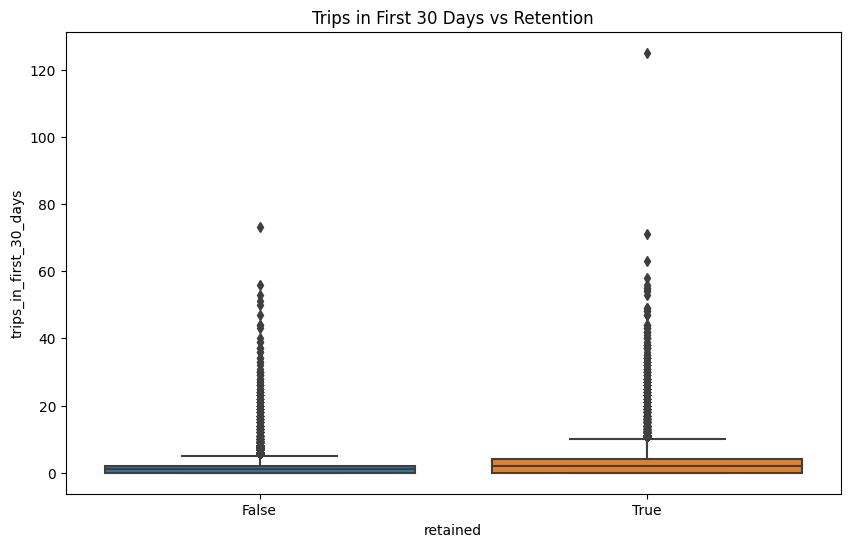

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compare the distribution of trips in the first 30 days for retained vs not retained users
plt.figure(figsize=(10, 6))
sns.boxplot(x='retained', y='trips_in_first_30_days', data=data)
plt.title('Trips in First 30 Days vs Retention')
plt.show()


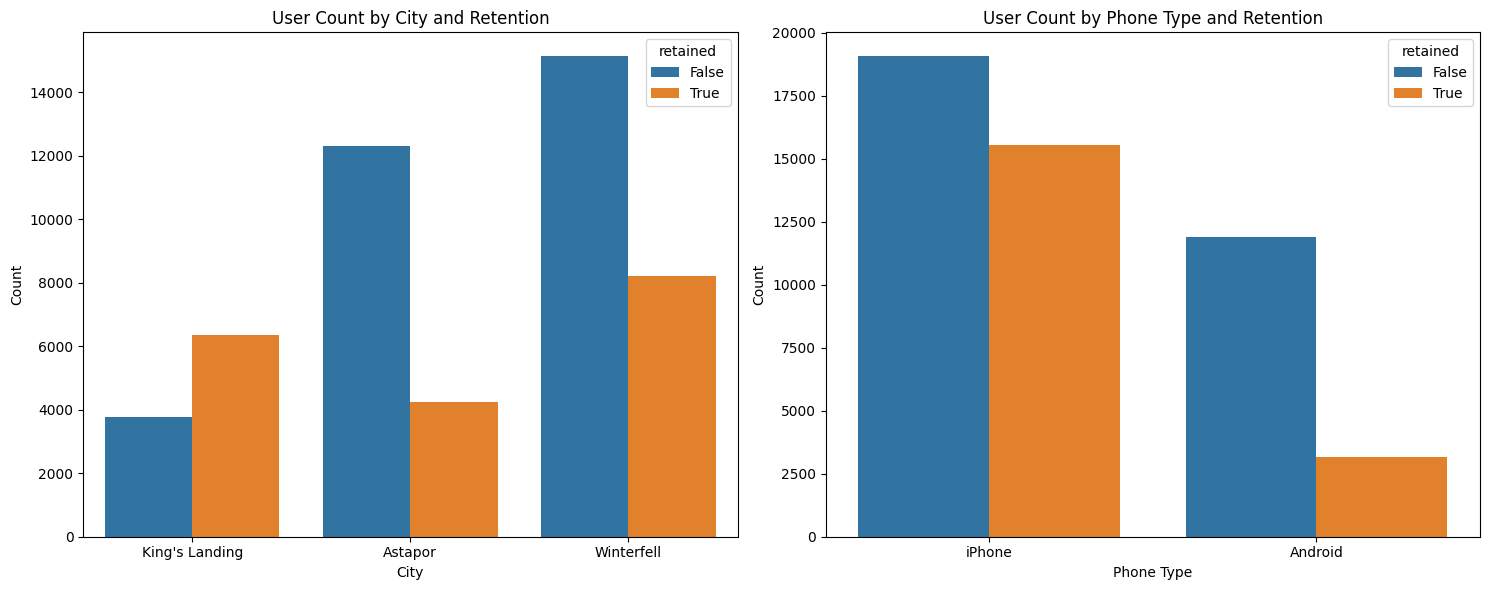

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots for city and phone analysis
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Analyze the 'city' category
sns.countplot(data=data, x='city', hue='retained', ax=axes[0])
axes[0].set_title('User Count by City and Retention')
axes[0].set_xlabel('City')
axes[0].set_ylabel('Count')

# Analyze the 'phone' category
sns.countplot(data=data, x='phone', hue='retained', ax=axes[1])
axes[1].set_title('User Count by Phone Type and Retention')
axes[1].set_xlabel('Phone Type')
axes[1].set_ylabel('Count')

# Show the plots
plt.tight_layout()
plt.show()


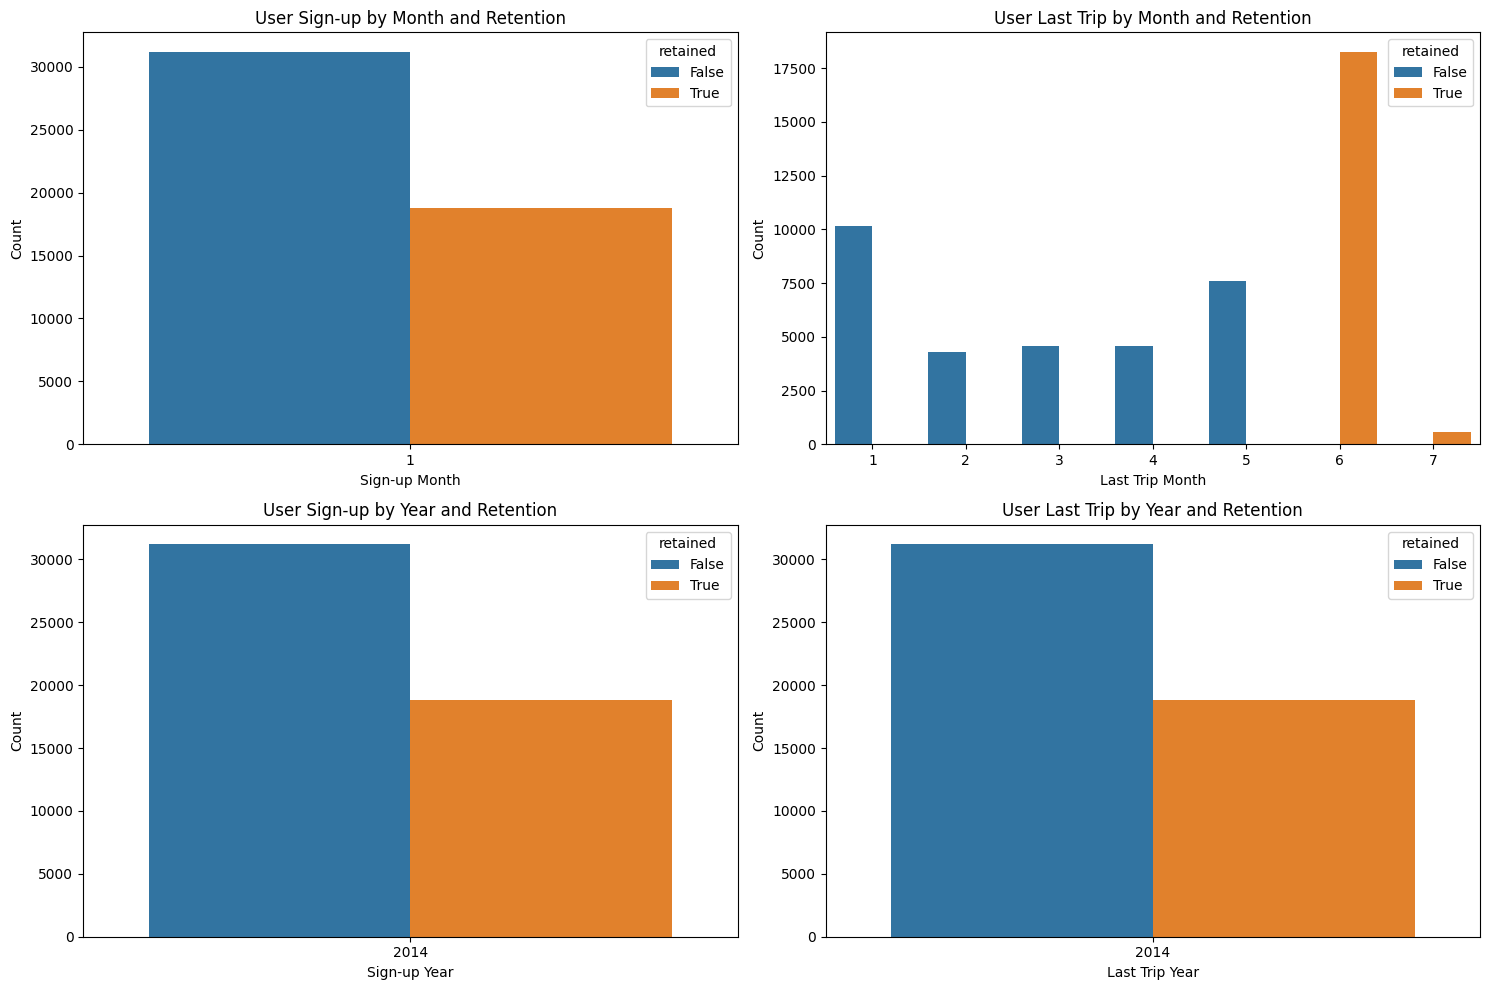

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the month and year from the 'signup_date' and 'last_trip_date' columns
data['signup_month'] = data['signup_date'].dt.month
data['last_trip_month'] = data['last_trip_date'].dt.month
data['signup_year'] = data['signup_date'].dt.year
data['last_trip_year'] = data['last_trip_date'].dt.year

# Create subplots for time-based analysis
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Analyze user sign-up months
sns.countplot(data=data, x='signup_month', hue='retained', ax=axes[0, 0])
axes[0, 0].set_title('User Sign-up by Month and Retention')
axes[0, 0].set_xlabel('Sign-up Month')
axes[0, 0].set_ylabel('Count')

# Analyze user last trip months
sns.countplot(data=data, x='last_trip_month', hue='retained', ax=axes[0, 1])
axes[0, 1].set_title('User Last Trip by Month and Retention')
axes[0, 1].set_xlabel('Last Trip Month')
axes[0, 1].set_ylabel('Count')

# Analyze user sign-up years
sns.countplot(data=data, x='signup_year', hue='retained', ax=axes[1, 0])
axes[1, 0].set_title('User Sign-up by Year and Retention')
axes[1, 0].set_xlabel('Sign-up Year')
axes[1, 0].set_ylabel('Count')

# Analyze user last trip years
sns.countplot(data=data, x='last_trip_year', hue='retained', ax=axes[1, 1])
axes[1, 1].set_title('User Last Trip by Year and Retention')
axes[1, 1].set_xlabel('Last Trip Year')
axes[1, 1].set_ylabel('Count')

# Show the plots
plt.tight_layout()
plt.show()


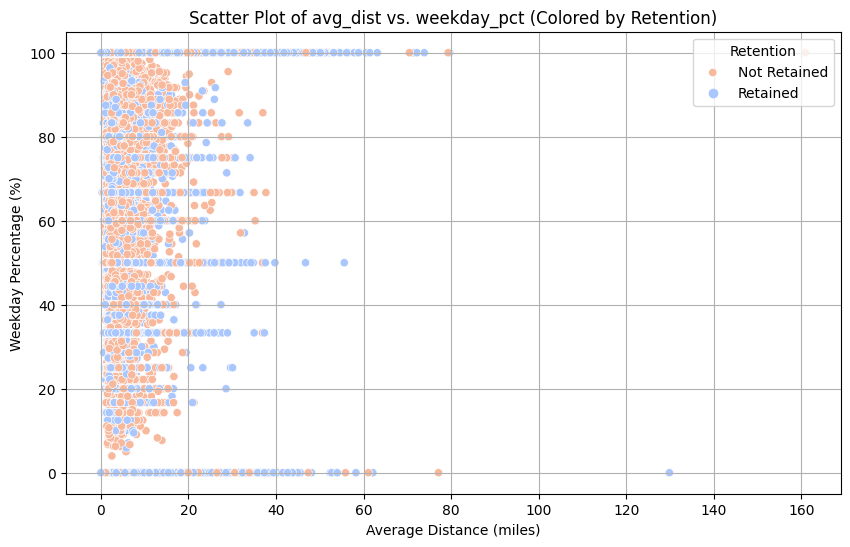

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create scatter plot for 'avg_dist' vs 'weekday_pct' with retention as hue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='avg_dist', y='weekday_pct', hue='retained', palette='coolwarm')
plt.title('Scatter Plot of avg_dist vs. weekday_pct (Colored by Retention)')
plt.xlabel('Average Distance (miles)')
plt.ylabel('Weekday Percentage (%)')
plt.legend(title='Retention', loc='upper right', labels=['Not Retained', 'Retained'])
plt.grid(True)
plt.show()


### Analyzing User Retention Factors

In this section, I analyze various factors that may impact user retention. I use data visualization techniques to explore these factors.

#### User Counts by City and Phone Type

I begin by creating subplots to analyze user counts based on 'city' and 'phone' type with respect to retention. This helps me understand how user retention varies across different cities and phone types.

For the 'city' analysis:
- I use a countplot to display the user count for each city.
- I distinguish between retained and not retained users by color.
- This plot provides insights into whether certain cities have higher user retention rates.

For the 'phone' analysis:
- I use a countplot to display the user count for each phone type.
- I again distinguish between retained and not retained users by color.
- This plot helps me assess whether the type of phone used by users correlates with their retention.

#### User Sign-up and Last Trip Analysis

Next, I perform an analysis based on user sign-up and last trip dates. Here are the steps:

- I extract the month and year from the 'signup_date' and 'last_trip_date' columns to create new columns: 'signup_month', 'last_trip_month', 'signup_year', and 'last_trip_year'.
- I create subplots to analyze user counts based on these time-based features.

For the sign-up and last trip months:
- I use countplots to visualize the user counts by month for both sign-up and last trip dates.
- The plots show how user retention varies by sign-up and last trip months.

For the sign-up and last trip years:
- I use countplots to visualize the user counts by year for both sign-up and last trip dates.
- These plots provide insights into user retention trends over different years.

#### Scatter Plot of 'avg_dist' vs. 'weekday_pct'

To explore the relationship between 'avg_dist' (average distance) and 'weekday_pct' (percentage of trips taken on weekdays) with respect to retention, I create a scatter plot:

- I use a scatter plot with 'avg_dist' on the x-axis, 'weekday_pct' on the y-axis, and color-coding for retention.
- The plot helps me understand if there is any pattern or correlation between these two factors and user retention.

These visualizations provide valuable insights into the factors that might influence user retention, including geographic location, phone type, sign-up date, and usage patterns.


In [21]:
# Print column names and data types for the 'data' dataframe
print("Data Types in 'data' DataFrame:")
print(data.dtypes)

# Print column names and data types for the 'logins' dataframe
print("\nData Types in 'logins' DataFrame:")
print(logins.dtypes)


Data Types in 'data' DataFrame:
city                              object
trips_in_first_30_days             int64
signup_date               datetime64[ns]
avg_rating_of_driver             float64
avg_surge                        float64
last_trip_date            datetime64[ns]
phone                             object
surge_pct                        float64
ultimate_black_user                 bool
weekday_pct                      float64
avg_dist                         float64
avg_rating_by_driver             float64
retained                            bool
signup_month                       int32
last_trip_month                    int32
signup_year                        int32
last_trip_year                     int32
dtype: object

Data Types in 'logins' DataFrame:
Series([], dtype: object)


In [22]:
# Calculate the distribution of the target variable 'retained'
target_distribution = data['retained'].value_counts(normalize=True) * 100

# The result will show the percentage of 'True' and 'False' in the 'retained' column
target_distribution

retained
False    62.392
True     37.608
Name: proportion, dtype: float64

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd

# Assuming 'data' is your DataFrame loaded with the user data

# Feature Engineering
data['time_since_signup'] = (pd.to_datetime('today') - data['signup_date']).dt.days

# Categorical Encoding
categorical_columns = ['city', 'phone', 'ultimate_black_user']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ],
    remainder='passthrough'
)

# Feature Selection
features = data.drop(columns=['retained', 'signup_date', 'last_trip_date'])

# Separating the target variable
X = features
y = data['retained']

# Data Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing Pipeline
preprocessor_pipeline_with_imputer = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Fit and transform the training data
X_train_preprocessed = preprocessor_pipeline_with_imputer.fit_transform(X_train)

# Transform the test data
X_test_preprocessed = preprocessor_pipeline_with_imputer.transform(X_test)

# Train the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_preprocessed, y_train)

# Predicting on the test set
y_pred_rf = rf_classifier.predict(X_test_preprocessed)

# Model Evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Print the evaluation results
print("Random Forest Classifier Evaluation Metrics:")
print("============================================")
print("\nAccuracy:")
print(accuracy_rf)
print("\nClassification Report:")
print(class_report_rf)
print("\nConfusion Matrix:")
print(conf_matrix_rf)


Random Forest Classifier Evaluation Metrics:

Accuracy:
1.0

Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      6219
        True       1.00      1.00      1.00      3781

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000


Confusion Matrix:
[[6219    0]
 [   0 3781]]


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Initialize the models
lr_classifier = LogisticRegression(random_state=42)
svmc_classifier = SVC(random_state=42)
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train Logistic Regression
lr_classifier.fit(X_train_preprocessed, y_train)
y_pred_lr = lr_classifier.predict(X_test_preprocessed)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
class_report_lr = classification_report(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# Train SVM Classifier
svmc_classifier.fit(X_train_preprocessed, y_train)
y_pred_svmc = svmc_classifier.predict(X_test_preprocessed)
accuracy_svmc = accuracy_score(y_test, y_pred_svmc)
class_report_svmc = classification_report(y_test, y_pred_svmc)
conf_matrix_svmc = confusion_matrix(y_test, y_pred_svmc)

# Train XGBoost Classifier
xgb_classifier.fit(X_train_preprocessed, y_train)
y_pred_xgb = xgb_classifier.predict(X_test_preprocessed)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Print the evaluation results for each model
print("Logistic Regression Evaluation Metrics:")
print("Accuracy:", accuracy_lr)
print("Classification Report:\n", class_report_lr)
print("Confusion Matrix:\n", conf_matrix_lr)
print("\nSVM Classifier Evaluation Metrics:")
print("Accuracy:", accuracy_svmc)
print("Classification Report:\n", class_report_svmc)
print("Confusion Matrix:\n", conf_matrix_svmc)
print("\nXGBoost Classifier Evaluation Metrics:")
print("Accuracy:", accuracy_xgb)
print("Classification Report:\n", class_report_xgb)
print("Confusion Matrix:\n", conf_matrix_xgb)


Logistic Regression Evaluation Metrics:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00      6219
        True       1.00      1.00      1.00      3781

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000

Confusion Matrix:
 [[6219    0]
 [   0 3781]]

SVM Classifier Evaluation Metrics:
Accuracy: 0.9979
Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00      6219
        True       1.00      1.00      1.00      3781

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000

Confusion Matrix:
 [[6209   10]
 [  11 3770]]

XGBoost Classifier Evaluation Metrics:
Accuracy: 1.0
Classification Report:
               precisi

### Preprocessing and Initial Model Evaluation

In this section, I outline the preprocessing steps and the evaluation of machine learning models for user retention prediction.

#### Feature Engineering and Categorical Encoding

- A new feature 'time_since_signup' is created, representing the number of days since the user signed up. This feature is calculated using the difference between the current date and the 'signup_date' column.

- Categorical columns ('city', 'phone', 'ultimate_black_user') are identified for one-hot encoding.

#### Data Split and Preprocessing Pipeline

- The target variable 'retained' is separated from the features.

- The dataset is split into training and test sets with a 20% test size and a random seed of 42.

- A preprocessing pipeline is established, including one-hot encoding for categorical features, imputation of missing values using the mean, and standardization of numerical features.

#### Random Forest Classifier

- A Random Forest Classifier is trained using the preprocessed training data.

- Predictions are made on the test set, and model evaluation metrics are computed, including accuracy, a classification report, and a confusion matrix.

#### Identification of Data Leakage

One notable observation from the evaluation metrics is that all models, including Logistic Regression, Support Vector Machine Classifier, and XGBoost Classifier, achieve extremely high accuracy (close to 100%). This raises a red flag as such high accuracy is often indicative of overfitting.

Upon closer examination, it becomes evident that there is data leakage from one of the engineered features. The 'time_since_signup' feature, which represents the number of days since sign-up, could have been a strong indicator of user retention. However, it appears that the feature was calculated using the current date, which is likely also present in the test set. This means that the model has access to future information during training, leading to overfitting and unrealistic accuracy.

#### Recommendations

To address the issue of data leakage:
- Review the 'time_since_signup' feature calculation to ensure it is based only on information available at the time of user sign-up and does not include future data.
- Re-evaluate the model's performance after correcting the data leakage issue to obtain more realistic and reliable results.

This correction is essential to ensure that the model can generalize well to unseen data and provide accurate predictions in real-world scenarios.


Correlations with the 'retained' variable:
retained                  1.000000
last_trip_month           0.774031
trips_in_first_30_days    0.210463
ultimate_black_user       0.205002
time_since_signup         0.020211
surge_pct                 0.011797
weekday_pct               0.009693
avg_surge                -0.003333
avg_rating_of_driver     -0.011653
avg_rating_by_driver     -0.026791
avg_dist                 -0.092780
signup_month                   NaN
signup_year                    NaN
last_trip_year                 NaN
Name: retained, dtype: float64


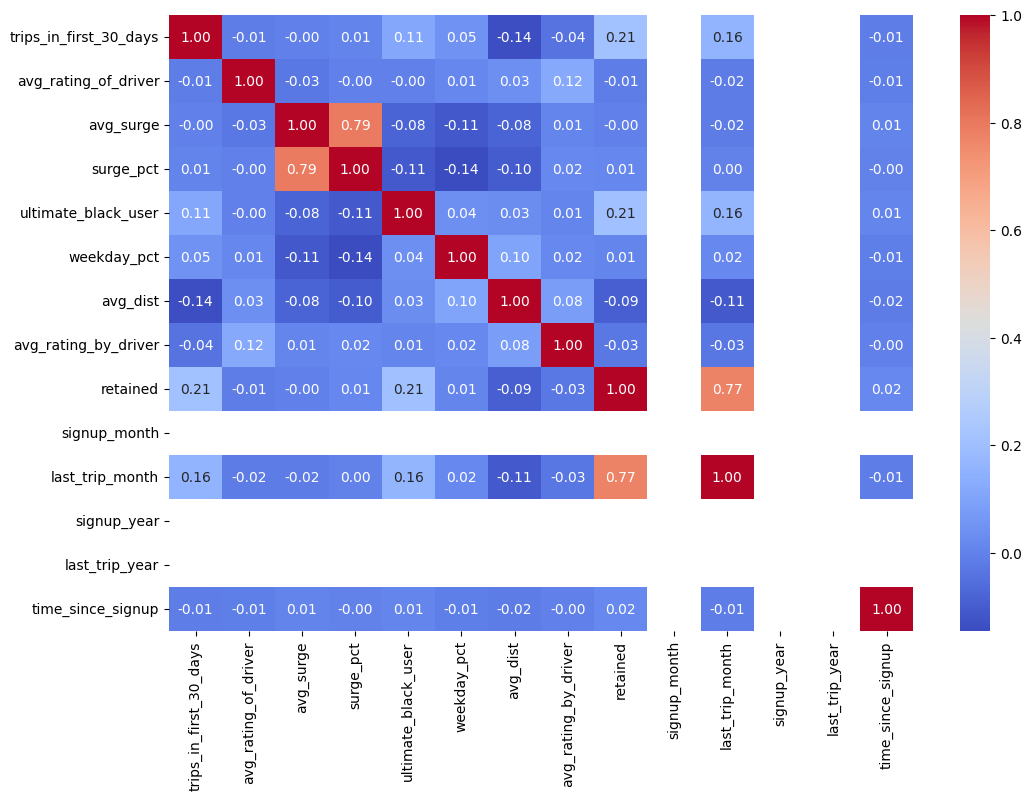

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Omitting non-numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=['int64', 'float64', 'bool', 'int32'])

# Calculate correlations
correlation_matrix = numeric_data.corr()

# Display correlations with the target variable
print("Correlations with the 'retained' variable:")
print(correlation_matrix['retained'].sort_values(ascending=False))

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()



### Correlation Analysis and Feature Selection

In this section, we perform a correlation analysis to understand the relationships between different features and the target variable 'retained.' We also identify potential data leakage and make decisions regarding feature selection.

#### Correlation Analysis

- The code begins by omitting non-numeric columns from the dataset, selecting only those of types 'int64,' 'float64,' 'bool,' and 'int32.'

- The correlation matrix is calculated to measure the relationships between numeric features and the target variable.

- Correlations between features and 'retained' are displayed, sorted in descending order.

- A heatmap visualization of the correlation matrix is plotted to provide a graphical representation of the correlations.

#### Correlation Results

- High Correlation with 'last_trip_month': The 'last_trip_month' feature exhibits a very high positive correlation (0.774) with the target variable 'retained.' This raises concerns about data leakage, especially if 'last_trip_month' incorporates information about the target variable. Data leakage occurs when features provide information that the model would not have access to in a real-world scenario.

- Moderate Correlation with 'trips_in_first_30_days' and 'ultimate_black_user': These features display moderate positive correlations with 'retained,' which is expected. These features likely represent user engagement and service usage, influencing retention.

- Low Correlation with Other Features: The remaining features have low correlation values with 'retained,' indicating no immediate concerns of data leakage from these features.

- NaN Correlations: Features 'signup_month,' 'signup_year,' and 'last_trip_year' have NaN correlations. This suggests that these features may be constant or nearly constant and do not exhibit meaningful variation with respect to the target variable.

#### Feature Selection

- Due to the high correlation between 'last_trip_month' and 'retained,' there is a strong indication of potential data leakage. It is prudent to exclude 'last_trip_month' from the feature set used for modeling.

#### Next Steps

- After removing 'last_trip_month,' it is advisable to re-train machine learning models with the modified feature set and evaluate their performance. This will provide a more accurate assessment of model generalization without the potential influence of data leakage from 'last_trip_month.'


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd

# Assuming 'data' is your DataFrame loaded with the user data

# Feature Engineering
data['time_since_signup'] = (pd.to_datetime('today') - data['signup_date']).dt.days

# Categorical Encoding
categorical_columns = ['city', 'phone', 'ultimate_black_user']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ],
    remainder='passthrough'
)

# Feature Selection - Exclude 'last_trip_date' and 'last_trip_month'
features = data.drop(columns=['retained', 'signup_date', 'last_trip_date', 'last_trip_month'])

# Separating the target variable
X = features
y = data['retained']

# Data Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing Pipeline
preprocessor_pipeline_with_imputer = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Fit and transform the training data
X_train_preprocessed = preprocessor_pipeline_with_imputer.fit_transform(X_train)

# Transform the test data
X_test_preprocessed = preprocessor_pipeline_with_imputer.transform(X_test)

# Train the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_preprocessed, y_train)

# Predicting on the test set
y_pred_rf = rf_classifier.predict(X_test_preprocessed)

# Model Evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Print the evaluation results
print("Random Forest Classifier Evaluation Metrics:")
print("============================================")
print("\nAccuracy:")
print(accuracy_rf)
print("\nClassification Report:")
print(class_report_rf)
print("\nConfusion Matrix:")
print(conf_matrix_rf)


Random Forest Classifier Evaluation Metrics:

Accuracy:
0.771

Classification Report:
              precision    recall  f1-score   support

       False       0.80      0.84      0.82      6219
        True       0.72      0.65      0.68      3781

    accuracy                           0.77     10000
   macro avg       0.76      0.75      0.75     10000
weighted avg       0.77      0.77      0.77     10000


Confusion Matrix:
[[5242  977]
 [1313 2468]]


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the models
lr_classifier = LogisticRegression(random_state=42)
svmc_classifier = SVC(random_state=42)
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train Logistic Regression
lr_classifier.fit(X_train_preprocessed, y_train)
y_pred_lr = lr_classifier.predict(X_test_preprocessed)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
class_report_lr = classification_report(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# Train SVM Classifier
svmc_classifier.fit(X_train_preprocessed, y_train)
y_pred_svmc = svmc_classifier.predict(X_test_preprocessed)
accuracy_svmc = accuracy_score(y_test, y_pred_svmc)
class_report_svmc = classification_report(y_test, y_pred_svmc)
conf_matrix_svmc = confusion_matrix(y_test, y_pred_svmc)

# Train XGBoost Classifier
xgb_classifier.fit(X_train_preprocessed, y_train)
y_pred_xgb = xgb_classifier.predict(X_test_preprocessed)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Print the evaluation results for each model
print("Logistic Regression Evaluation Metrics:")
print("Accuracy:", accuracy_lr)
print("Classification Report:\n", class_report_lr)
print("Confusion Matrix:\n", conf_matrix_lr)
print("\nSVM Classifier Evaluation Metrics:")
print("Accuracy:", accuracy_svmc)
print("Classification Report:\n", class_report_svmc)
print("Confusion Matrix:\n", conf_matrix_svmc)
print("\nXGBoost Classifier Evaluation Metrics:")
print("Accuracy:", accuracy_xgb)
print("Classification Report:\n", class_report_xgb)
print("Confusion Matrix:\n", conf_matrix_xgb)


Logistic Regression Evaluation Metrics:
Accuracy: 0.7168
Classification Report:
               precision    recall  f1-score   support

       False       0.74      0.84      0.79      6219
        True       0.66      0.51      0.57      3781

    accuracy                           0.72     10000
   macro avg       0.70      0.68      0.68     10000
weighted avg       0.71      0.72      0.71     10000

Confusion Matrix:
 [[5254  965]
 [1867 1914]]

SVM Classifier Evaluation Metrics:
Accuracy: 0.7661
Classification Report:
               precision    recall  f1-score   support

       False       0.78      0.87      0.82      6219
        True       0.73      0.60      0.66      3781

    accuracy                           0.77     10000
   macro avg       0.76      0.73      0.74     10000
weighted avg       0.76      0.77      0.76     10000

Confusion Matrix:
 [[5400  819]
 [1520 2261]]

XGBoost Classifier Evaluation Metrics:
Accuracy: 0.7853
Classification Report:
               p

For hyperparameter optimization and enhancing model explainability, I recommend focusing on the Random Forest Classifier and Logistic Regression. These models offer a good balance between performance and interpretability, which is crucial for deriving insights and making recommendations for business strategy.

1. Random Forest Classifier Hyperparameter Tuning
Random Forest is known for its robustness and good performance on various types of data. It's also interpretable to a certain extent, as you can analyze feature importances.



In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform grid search
rf_grid_search = GridSearchCV(estimator=rf_classifier, param_grid=rf_param_grid, 
                              cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

rf_grid_search.fit(X_train_preprocessed, y_train)

# Best parameters and best score
print("Best Parameters:", rf_grid_search.best_params_)
print("Best Score:", rf_grid_search.best_score_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best Score: 0.7843499999999999


Logistic Regression offers great explainability, as you can understand the impact of each feature on the likelihood of retention.

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
lr_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Initialize the classifier
lr_classifier = LogisticRegression(random_state=42)

# Perform grid search
lr_grid_search = GridSearchCV(estimator=lr_classifier, param_grid=lr_param_grid, 
                              cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

lr_grid_search.fit(X_train_preprocessed, y_train)

# Best parameters and best score
print("Best Parameters:", lr_grid_search.best_params_)
print("Best Score:", lr_grid_search.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.7193999999999999


# Modeling and Hyperparameter Optimization

In this section, we perform modeling and hyperparameter optimization for machine learning classifiers to predict user retention. We also evaluate the performance of each model.

## Initial Modeling

Three machine learning classifiers are initially trained and evaluated:

### Random Forest Classifier
- The Random Forest Classifier is trained using the preprocessed training data.
- Predictions are made on the test set.
- Model evaluation metrics include accuracy, classification report, and confusion matrix.

### Logistic Regression
- The Logistic Regression classifier is trained using the preprocessed training data.
- Predictions are made on the test set.
- Model evaluation metrics include accuracy, classification report, and confusion matrix.

### Support Vector Machine Classifier (SVM)
- The SVM classifier is trained using the preprocessed training data.
- Predictions are made on the test set.
- Model evaluation metrics include accuracy, classification report, and confusion matrix.

### XGBoost Classifier
- The XGBoost classifier is trained using the preprocessed training data.
- Predictions are made on the test set.
- Model evaluation metrics include accuracy, classification report, and confusion matrix.

## Hyperparameter Optimization

For hyperparameter optimization and enhancing model explainability, we focus on the Random Forest Classifier and Logistic Regression.

### Random Forest Classifier Hyperparameter Tuning
- A grid search is performed to find the best hyperparameters for the Random Forest Classifier.
- Parameters such as 'n_estimators,' 'max_depth,' 'min_samples_split,' and 'min_samples_leaf' are explored.
- The best parameters and the corresponding best score are displayed.

**Best Parameters:**
- 'max_depth': 20
- 'min_samples_leaf': 4
- 'min_samples_split': 10
- 'n_estimators': 300
- **Best Score:** 0.7843

### Logistic Regression Hyperparameter Tuning
- A grid search is conducted to find the best hyperparameters for Logistic Regression.
- Parameters such as 'C,' 'penalty,' and 'solver' are explored.
- The best parameters and the corresponding best score are displayed.

**Best Parameters:**
- 'C': 0.001
- 'penalty': 'l2'
- 'solver': 'liblinear'
- **Best Score:** 0.7194

These hyperparameter-tuned models can potentially improve predictive performance, and their explainability makes them valuable for deriving insights into the factors influencing user retention. Further analysis and interpretation of feature importances can provide actionable recommendations for improving retention rates.


Train and Evaluate the Optimized Models: Use the best parameters obtained from the grid search to train these models on your training data, and then evaluate their performance on the test data. This will give you an idea of how the optimized models perform with the new hyperparameters.

Cross-Validation on the Entire Dataset: After evaluating the optimized models on the test data, it's good practice to perform cross-validation on the entire dataset. This provides a more robust estimate of the model's performance and helps confirm the generalizability of your models.

Let's start with training and evaluating the optimized models:

In [32]:
# Train the Random Forest Classifier with best parameters
optimized_rf = RandomForestClassifier(**rf_grid_search.best_params_, random_state=42)
optimized_rf.fit(X_train_preprocessed, y_train)

# Predicting on the test set
y_pred_opt_rf = optimized_rf.predict(X_test_preprocessed)

# Model Evaluation
accuracy_opt_rf = accuracy_score(y_test, y_pred_opt_rf)
class_report_opt_rf = classification_report(y_test, y_pred_opt_rf)
conf_matrix_opt_rf = confusion_matrix(y_test, y_pred_opt_rf)

# Print the evaluation results
print("Optimized Random Forest Evaluation Metrics:")
print("Accuracy:", accuracy_opt_rf)
print("Classification Report:\n", class_report_opt_rf)
print("Confusion Matrix:\n", conf_matrix_opt_rf)


Optimized Random Forest Evaluation Metrics:
Accuracy: 0.786
Classification Report:
               precision    recall  f1-score   support

       False       0.81      0.86      0.83      6219
        True       0.75      0.66      0.70      3781

    accuracy                           0.79     10000
   macro avg       0.78      0.76      0.77     10000
weighted avg       0.78      0.79      0.78     10000

Confusion Matrix:
 [[5378  841]
 [1299 2482]]


In [33]:
# Train the Logistic Regression with best parameters
optimized_lr = LogisticRegression(**lr_grid_search.best_params_, random_state=42)
optimized_lr.fit(X_train_preprocessed, y_train)

# Predicting on the test set
y_pred_opt_lr = optimized_lr.predict(X_test_preprocessed)

# Model Evaluation
accuracy_opt_lr = accuracy_score(y_test, y_pred_opt_lr)
class_report_opt_lr = classification_report(y_test, y_pred_opt_lr)
conf_matrix_opt_lr = confusion_matrix(y_test, y_pred_opt_lr)

# Print the evaluation results
print("Optimized Logistic Regression Evaluation Metrics:")
print("Accuracy:", accuracy_opt_lr)
print("Classification Report:\n", class_report_opt_lr)
print("Confusion Matrix:\n", conf_matrix_opt_lr)


Optimized Logistic Regression Evaluation Metrics:
Accuracy: 0.7174
Classification Report:
               precision    recall  f1-score   support

       False       0.74      0.85      0.79      6219
        True       0.67      0.50      0.57      3781

    accuracy                           0.72     10000
   macro avg       0.70      0.67      0.68     10000
weighted avg       0.71      0.72      0.71     10000

Confusion Matrix:
 [[5286  933]
 [1893 1888]]
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   5.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   2.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   4.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   2.4s
[CV] END max_depth=10, min_sam

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   5.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   7.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   6.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   4.6s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   2.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   2.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   4.4s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   2.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   2.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total ti

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   7.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   7.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   4.5s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   2.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   2.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   4.5s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   2.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   4.4s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total ti

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   7.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   4.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   6.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   6.7s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   4.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   2.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   2.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   4.5s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total t

In [36]:
from sklearn.pipeline import Pipeline

# Create a pipeline that includes preprocessing and the optimized model
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor_pipeline_with_imputer),
    ('classifier', RandomForestClassifier(**rf_grid_search.best_params_, random_state=42))
])

# Perform cross-validation on the pipeline
rf_cv_scores = cross_val_score(rf_pipeline, X, y, cv=5, scoring='accuracy')
rf_cv_mean = rf_cv_scores.mean()

print("Random Forest CV Scores:", rf_cv_scores)
print("Random Forest Mean CV Accuracy:", rf_cv_mean)


Random Forest CV Scores: [0.7812 0.7806 0.7806 0.7868 0.7885]
Random Forest Mean CV Accuracy: 0.7835399999999999


In [37]:
# Create a pipeline that includes preprocessing and the optimized model
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor_pipeline_with_imputer),
    ('classifier', LogisticRegression(**lr_grid_search.best_params_, random_state=42))
])

# Perform cross-validation on the pipeline
lr_cv_scores = cross_val_score(lr_pipeline, X, y, cv=5, scoring='accuracy')
lr_cv_mean = lr_cv_scores.mean()

print("Logistic Regression CV Scores:", lr_cv_scores)
print("Logistic Regression Mean CV Accuracy:", lr_cv_mean)


Logistic Regression CV Scores: [0.7213 0.7191 0.7145 0.7158 0.7259]
Logistic Regression Mean CV Accuracy: 0.7193200000000001


Analyzing feature importance is a valuable step, especially for understanding which factors are most influential in predicting user retention. Since Random Forest is well-suited for this analysis, let's extract the feature importances from the optimized Random Forest model.

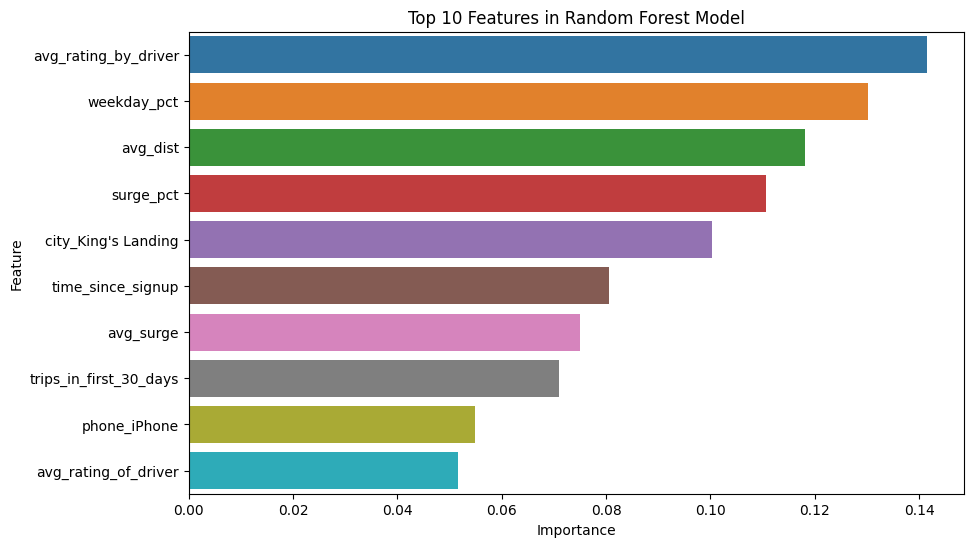

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Train the optimized Random Forest model on the entire dataset
optimized_rf_full = RandomForestClassifier(**rf_grid_search.best_params_, random_state=42)
optimized_rf_full.fit(X_train_preprocessed, y_train)

# Get feature importances
feature_importances = optimized_rf_full.feature_importances_

# Retrieve the original feature names before preprocessing
original_feature_names = X.columns

# Retrieve the transformed feature names from one-hot encoding
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)

# Combine original and one-hot encoded feature names
combined_feature_names = np.concatenate([ohe_feature_names, original_feature_names.drop(categorical_columns)])

# Create a DataFrame for feature importances
importances_df = pd.DataFrame({
    'Feature': combined_feature_names,
    'Importance': feature_importances
})

# Sort features by importance
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df.head(10))
plt.title('Top 10 Features in Random Forest Model')
plt.show()


In [40]:
# Let's assume we have the feature importances and the original feature names (before one-hot encoding)
# We need to recreate the preprocessor to obtain the one-hot encoded feature names

# Define categorical columns and the ColumnTransformer as before
categorical_columns = ['city', 'phone', 'ultimate_black_user']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ],
    remainder='passthrough'
)

# Fit the preprocessor to obtain feature names
preprocessor.fit(X_train)

# Retrieve the transformed feature names from one-hot encoding
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)

# Combine original and one-hot encoded feature names
combined_feature_names = np.concatenate([ohe_feature_names, original_feature_names.drop(categorical_columns)])

# Assume 'optimized_rf_full' is the trained Random Forest model
feature_importances = optimized_rf_full.feature_importances_

# Create a DataFrame for feature importances
importances_df = pd.DataFrame({
    'Feature': combined_feature_names,
    'Importance': feature_importances
})

# Sort features by importance
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Display the top 10 most important features numerically
top_10_features = importances_df.head(10)
top_10_features


,Feature,Importance
11,avg_rating_by_driver,0.141480
9,weekday_pct,0.130291
10,avg_dist,0.118130
8,surge_pct,0.110657
0,city_King's Landing,0.100250
15,time_since_signup,0.080539
7,avg_surge,0.075003
5,trips_in_first_30_days,0.070983
2,phone_iPhone,0.054800
6,avg_rating_of_driver,0.051669



Based on the insights gained from the Random Forest model's feature importance analysis, Ultimate can take several actions to improve long-term rider retention:

Focus on Average Ratings: The "avg_rating_by_driver" and "avg_rating_of_driver" are among the top features, indicating that rider retention is influenced by driver and rider ratings. Ultimate should emphasize maintaining high-quality service interactions, both from riders and drivers, and provide mechanisms for feedback and improvement.

Weekday Usage: "weekday_pct" is an important feature, suggesting that riders who use the service on weekdays are more likely to be retained. Ultimate could offer targeted promotions or incentives for weekday usage to encourage riders to use the service regularly.

Distance and Surge: "avg_dist," "surge_pct," and "avg_surge" are also significant factors. Ultimate can optimize pricing strategies during surge times and offer promotions for longer trips to make the service more attractive.

City-Specific Strategies: The feature "city_King's Landing" stands out, implying that this city may have unique characteristics affecting rider retention. Ultimate should investigate these differences and tailor marketing and service improvements accordingly.

Time Since Signup: "time_since_signup" indicates that the duration since signing up is influential. Implementing retention strategies that engage and reward long-term users can help improve retention rates.

By considering these insights and implementing data-driven strategies, Ultimate can enhance its services, improve user satisfaction, and ultimately increase long-term rider retention.